In [16]:
#读取excel
import pandas as pd
# 行列式、矩阵处理
import numpy as np
#画图
import seaborn as sns
import matplotlib.pyplot as plt
#树
from sklearn import tree
#导入机器学习linear_model库
from sklearn import linear_model
#导入交叉验证库
from sklearn import cross_validation

from sklearn.linear_model import LinearRegression

# 在代码中画图
%matplotlib inline

In [17]:
#载入Excel 文件
book = pd.read_csv("/Users/page/data/book/newbook.csv")

In [18]:
book.head()

,id,CBS_Class,CBS_MY_Order,CBS_MY_Rate,CBS_XS_MY,CBS_DXPZ,CBS_XSCS,CBS_CRTAX,Book_Class,CBS_BK_Average_price,...,FXS_Class,User_Area,User_Get_Price,FXS_Discount,FXS_BK_MY_Order,FXS_BK_MY_Rate,FXS_BK_MY,FXS_BK_DXPZ,FXS_BK_XSCS,FXS_BK_Average_Price
0,0,1,11,1.0934,90678033.8,2921,2357742,0.07,1,34.83,...,3,2,9,0.585,2,3.4196,15289978.1,1579,426206,35.87
1,1,1,11,1.0934,90678033.8,2921,2357742,0.07,6,17.75,...,3,2,9,0.585,484,0.0000,36.0,1,2,18.00
2,2,1,11,1.0934,90678033.8,2921,2357742,0.08,5,32.51,...,3,2,9,0.585,235,0.0099,15346.0,7,478,32.10
3,3,1,11,1.0934,90678033.8,2921,2357742,0.07,3,47.25,...,3,2,9,0.585,3,3.1915,10890168.2,405,232732,46.79
4,4,1,11,1.0934,90678033.8,2921,2357742,0.08,7,60.70,...,3,2,9,0.585,181,0.0240,59391.0,21,1022,58.11


In [48]:
X = book[['CBS_XS_MY', 'CBS_DXPZ', 'CBS_XSCS', 'CBS_CRTAX',
       'CBS_BK_Average_price', 'CBS_BK_MY_Order', 'CBS_BK_MY_Rate',
        'CBS_BK_DXPZ','User_Area',
       'User_Get_Price', 'FXS_Discount', 'FXS_BK_MY_Order', 'FXS_BK_MY_Rate',
       'FXS_BK_MY', 'FXS_BK_DXPZ', 'FXS_BK_XSCS', 'FXS_BK_Average_Price']]
y = book[['CBS_BK_XSCS']]

In [49]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=1)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3075, 17)
(1025, 17)
(3075, 1)
(1025, 1)


In [51]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(linreg.intercept_)
print (linreg.coef_)

[ 2061672.57951014]
[[ -1.53065544e-03  -1.80412333e+01   8.42300949e-02  -1.63650209e+07
   -3.72571214e+02  -1.23505214e+03   7.56822778e+04   2.12917065e+02
    6.17699470e+04  -7.66676696e-07  -1.41161113e+06   3.98363644e+02
   -4.37693497e+04   2.64393136e-02  -2.28197649e+02   2.19349693e+00
    7.79030775e+00]]


In [53]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 329883486958.0
RMSE: 574354.844115


In [54]:

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 377873942163.0
RMSE: 614714.520866


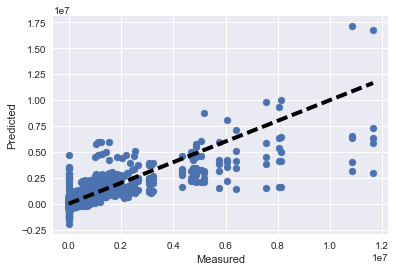

In [55]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()




/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['STXihei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


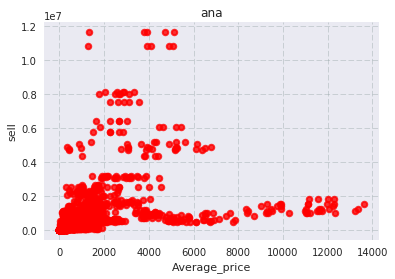

In [35]:
#将广告成本设为自变量X
X = np.array(book[['FXS_BK_DXPZ']])
#将点击量设为因变量Y
Y = np.array(y)
#查看自变量和因变量的行数
X.shape,Y.shape
#设置图表字体为华文细黑，字号15
plt.rc('font', family='STXihei', size=5)
#绘制散点图，广告成本X，点击量Y，设置颜色，标记点样式和透明度等参数
plt.scatter(X,Y,30,color='red',marker='o',linewidth=2,alpha=0.8)
#添加x轴标题
plt.xlabel('Average_price')
#添加y轴标题
plt.ylabel('sell')
#添加图表标题
plt.title('ana')
#设置背景网格线颜色，样式，尺寸和透明度
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
#显示图表
plt.show()

In [37]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit (X_train,y_train)

NameError: name 'X_train' is not defined